### 下载图片、pdf、mp4等所使用的python模块

In [5]:
import os
os.makedirs('./img/', exist_ok = True)
#检查元素，获得下载地址
IMAGE_URL = "https://geomtman.github.io/img/limin.jpg"


### way1:urlretrieve

In [7]:
from urllib.request import urlretrieve
urlretrieve(IMAGE_URL, './img/image1.png') #如何保存

('./img/image1.png', <http.client.HTTPMessage at 0x23720f3ef0>)

### way2:requests 

In [8]:
import requests
r = requests.get(IMAGE_URL)
with open('./img/image2.png', 'wb') as f:
    f.write(r.content)

#### 改进：当下载内容较大时，全部下载结束后再写入，这样会占用过多的内存。可以利用“chunk”，分片下载，chunk by chunk

In [10]:
r = requests.get(IMAGE_URL, stream=True)#stream参数设为True，时时刻刻下载，就像一条小河

with open('./img/image3.png', 'wb') as f:
    for chunk in r.iter_content(chunk_size=1):
        f.write(chunk)

### 激动人心的实战
#### 思路：
#### 我们循环爬取国家地理网站（http://www.ngchina.com.cn/animals/ ） 的图片，分析所要爬取的图片的元素特征，它的标签之类的有什么共同特性，使用 bs4 进行解析和提取，使用requests 进行下载和保存。

#### 这是我们所要爬取的目标：

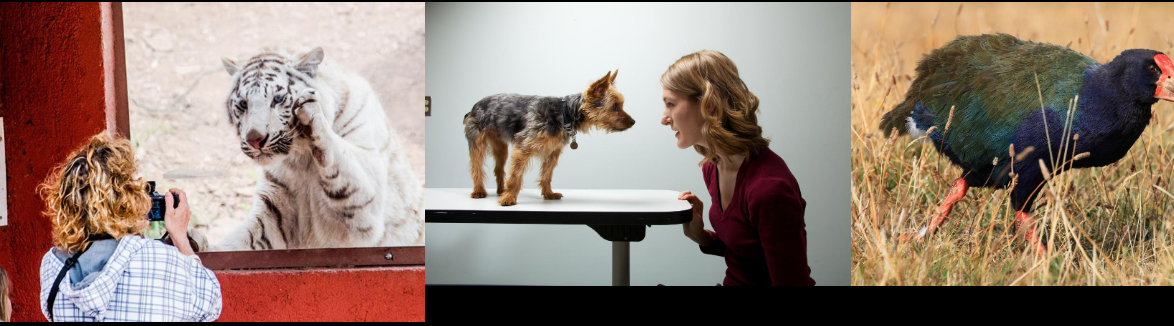

#### 我们可以以下两个特点定位到所要下载的图片：
##### ul标签中class="img_list"和img标签

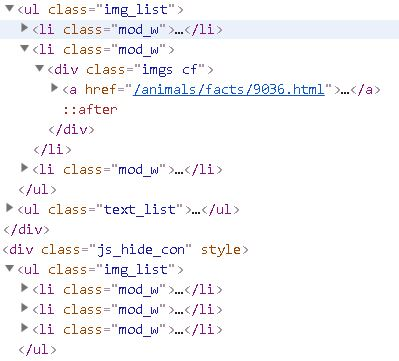

#### 思路明确后，代码搞起。

In [4]:
from bs4 import BeautifulSoup
import requests

URL = "http://www.ngchina.com.cn/animals/"

html = requests.get(URL).text#利用requests模块获得URL的html
soup = BeautifulSoup(html, 'lxml')#将html放入美丽汤中融化，解析方式为lxml，也可以选择其他模式
img_ul = soup.find_all('ul', {"class": "img_list"})#基于第一个特征进行第一次筛选


In [5]:
print(img_ul)#打印img_url，我们可以看到输出的内容中包含我们所要下载的六个图片的url

[<ul class="img_list">
<li class="mod_w">
<div class="imgs cf">
<a href="/animals/protection/9051.html"><img src="http://image.ngchina.com.cn/2019/0315/20190315032210262.jpg"/></a>
</div>
</li>
<li class="mod_w">
<div class="imgs cf">
<a href="/animals/facts/9036.html"><img src="http://image.ngchina.com.cn/2019/0307/20190307104540959.jpg"/></a>
</div>
</li>
<li class="mod_w">
<div class="imgs cf">
<a href="/animals/facts/9028.html"><img src="http://image.ngchina.com.cn/2019/0304/20190304105843578.jpg"/></a>
</div>
</li>
</ul>, <ul class="img_list">
<li class="mod_w">
<div class="imgs cf">
<a href="/animals/facts/9024.html"><img src="http://image.ngchina.com.cn/2019/0227/20190227110652432.jpg"/></a>
</div>
</li>
<li class="mod_w">
<div class="imgs cf">
<a href="/animals/facts/9020.html"><img src="http://image.ngchina.com.cn/2019/0225/20190225033757437.jpg"/></a>
</div>
</li>
<li class="mod_w">
<div class="imgs cf">
<a href="/animals/facts/9016.html"><img src="http://image.ngchina.com.cn

In [6]:
import os

os.makedirs('./img/', exist_ok= True)#通过os模块实现文件的保存

In [11]:
#开始设置循环。进行下载
#在img_ul对应的html中，存在两组 ul 标签，每一个ul标签内包含3个 img 标签，
#分别对应于不同图片
#因此，需要针对 ul 和 img 设置两层循环，进行下载。
for ul in img_ul:
    imgs = ul.find_all('img')
    for img in imgs:
        url = img['src']
        #采用chunk分片下载方式
        r = requests.get(url, stream = True)
        image_name = url.split('/')[-1]#将图片名设置为划分url后的最后一个元素
        with open('./img/%s' % image_name, 'wb') as f:
            for chunk in r.iter_content(chunk_size = 128):
                f.write(chunk)
        print('已保存 %s' % image_name)

已保存 20190315032210262.jpg
已保存 20190307104540959.jpg
已保存 20190304105843578.jpg
已保存 20190227110652432.jpg
已保存 20190225033757437.jpg
已保存 20190220104306406.jpg


大功告成，随便打开一个图片。
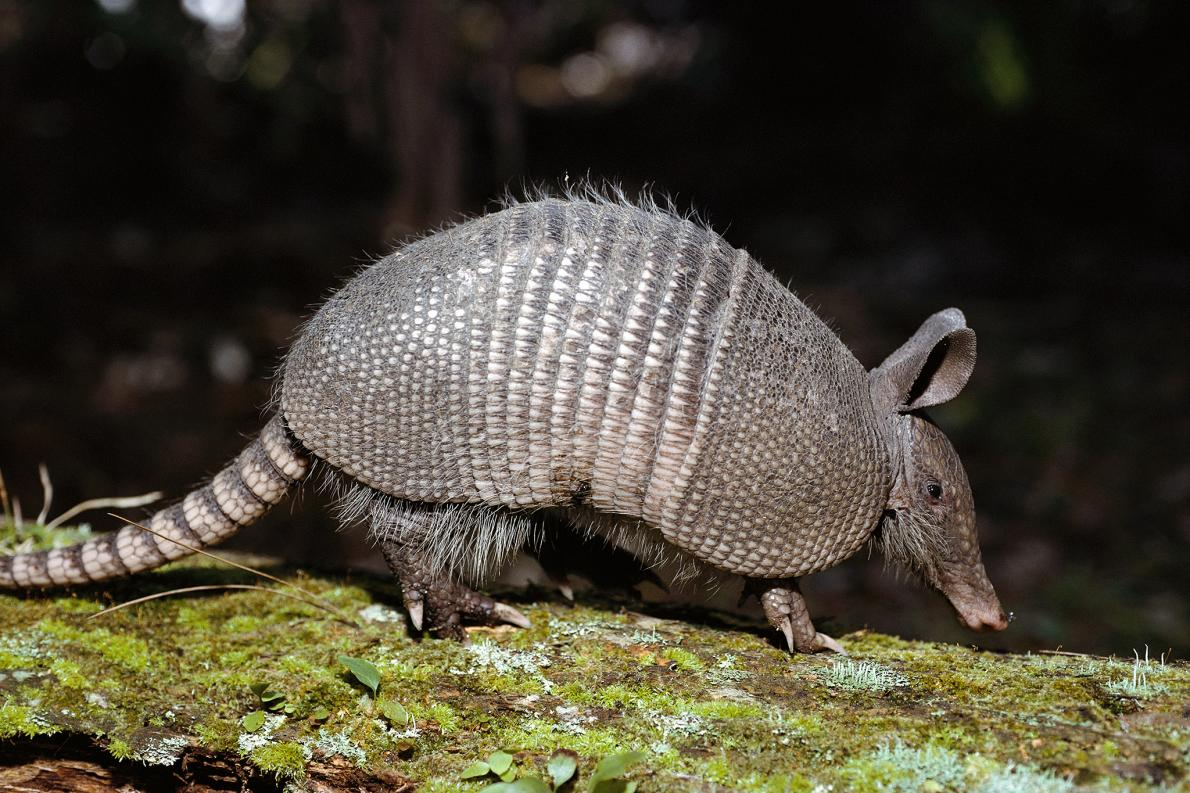